# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** Gabriel Tornare, Kilian Meier, Jérôme Savary  
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [2]:
import tarfile
import os
import skimage.io
import matplotlib.pyplot as plt

#method 1 :
import imageio #to load png pictures
from skimage import img_as_ubyte
from skimage import filters
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from skimage.filters import rank
from skimage.morphology import disk
from skimage.draw import rectangle
from skimage.measure import label
import numpy as np
from skimage.segmentation import watershed

#method 2 :
# from skimage.util import img_as_ubyte
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
data_base_path = os.path.join(os.pardir, '..\\..\\data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)
    
data_path = os.path.join(data_base_path, data_folder)

###  ================== JUST LABELS A PICTURE ================

(316, 1736, 4)


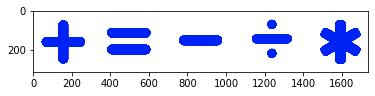

In [13]:
im = imageio.imread('../../data/original_operators.png')
print(im.shape)
plt.imshow(im[:,:,0:3])

(316, 1736)


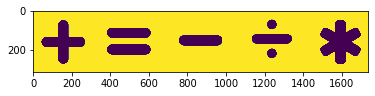

In [4]:
greyim = rgb2gray(rgba2rgb(im))
# or : greyim = rgb2gray(im[:,:,0:3])
print(greyim.shape)
plt.imshow(greyim)

In [9]:
width = greyim.shape[1]//5
symbols = [ None for i in np.arange(5)]
for i in np.arange(5):
  symbols[i] = greyim[:,width*i:width*(i+1)]

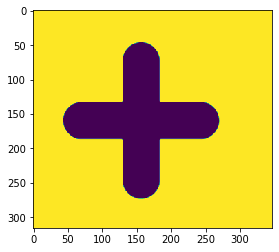

In [10]:
plt.imshow(symbols[0])

1


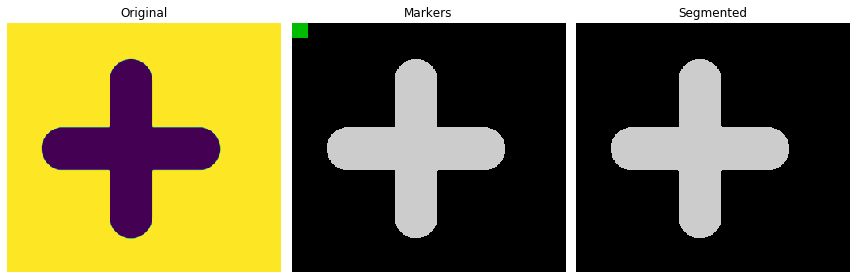

2


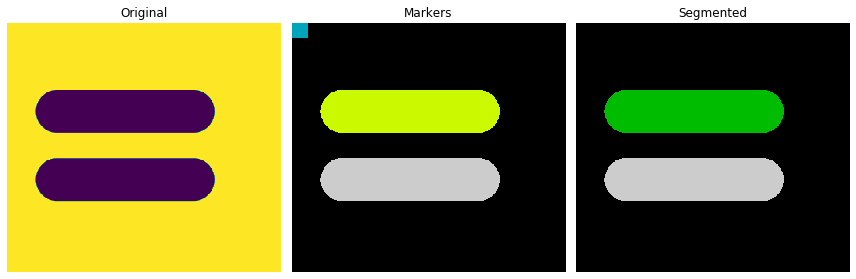

1


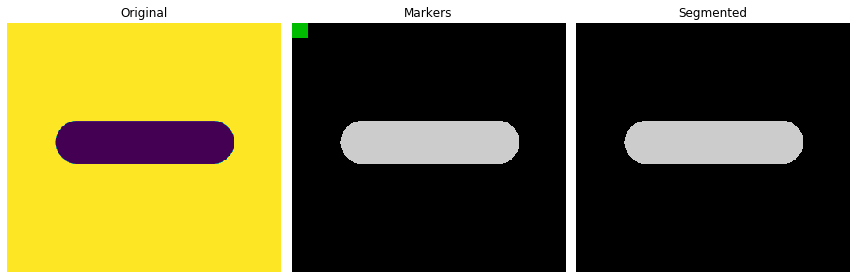

3


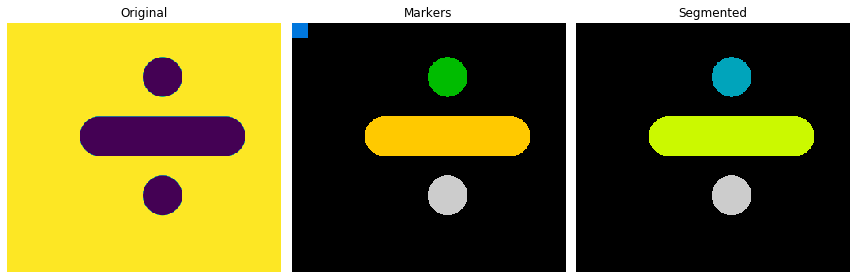

1


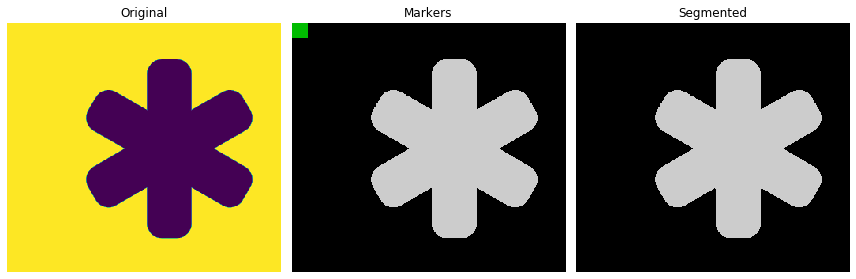

In [16]:
for im in symbols: #for each image
    im_gray = rgb2gray(im)      # convert to grayscale
    denoised = rank.median(img_as_ubyte(im_gray), disk(1))  # denoise image

    # define markers for wateshed : one small rectagle to define background
    # and markers where there is no background. The background is defined as an interval around the mean color of the image
    markers = np.zeros_like(im_gray)
    
                    #!!! maybe use Kmeans to classify the pixels in two classes : background from symbols ? 
    thresh = 0.9    #!!! np.average(im_gray)
    interval = 0.2  #!!! to adjust probably !!!
    markers[im_gray<thresh-interval] = 1
    markers[im_gray>thresh+interval] = 1
    rr, cc = rectangle((0,0), extent=(20,20), shape=markers.shape) #maybe to adjust the shape too
    markers[rr,cc] = 1    
    markers = label(markers)

    edge_sobel = filters.sobel(denoised)     # sobel edges
    labels = watershed(edge_sobel, markers)  # perform the watershed

    nb_obj = np.max(labels)-1
    print(nb_obj)
    
    # display results
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5),
                             sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(im)
    ax[0].set_title("Original")

    ax[1].imshow(markers, cmap=plt.cm.nipy_spectral, alpha=1)
    ax[1].set_title("Markers")

    ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=1)
    ax[2].set_title("Segmented")

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()

In [24]:
def compute_nb_objects(pic, thresh = 0.9, interval = 0.2):
    """
    return nb_object in the picture (background does NOT count as an object)
    also return the total area of the objects
    
    input : the picture is composed of pixel with values between 0 and 1 !!!
    
    """
    if pic.shape[-1] == 4:
        im_gray = np.copy(rgb2gray(rgba2rgb(im)))
    elif pic.shape[-1] == 3:
        im_gray = np.copy(rgb2gray(pic))  # convert to grayscale
    elif len(pic.shape) ==2: 
        im_gray = np.copy(pic)
    else:
        "\n This picture is neither RBGA nor RGB nor greyscale"
        
    denoised = rank.median(img_as_ubyte(im_gray), disk(1))  #denoise image
    # define markers for wateshed : one small rectagle to define background
    # and markers where there is no background. The background is defined as an interval around the mean color of the image
    markers = np.zeros_like(im_gray)
    
                    #!!! maybe use Kmeans to classify the pixels in two classes : background from symbols ? 
    #thresh = 0.9    #!!! np.average(im_gray)
    #interval = 0.2  #!!! to adjust probably !!!
    markers[im_gray<thresh-interval] = 1
    markers[im_gray>thresh+interval] = 1
    area = np.sum(markers==1)
    rr, cc = rectangle((0,0), extent=(20,20), shape=markers.shape) #maybe to adjust the shape too
    markers[rr,cc] = 1    
    markers = label(markers)

    edge_sobel = filters.sobel(denoised)     # sobel edges
    labels = watershed(edge_sobel, markers)  # perform the watershed

    nb_obj = np.max(labels)-1
    return nb_obj, area

In [25]:
for a in symbols:
    print(compute_nb_objects(a))

(1, 20324)
(2, 23251)
(1, 11624)
(3, 13926)
(1, 29320)
